# Absorber Thickness


Beam of 5.000.000 particles

Cross Sections:

```
Photoelectric *10 
Scattering Compton * 10
```


In [2]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.30/02


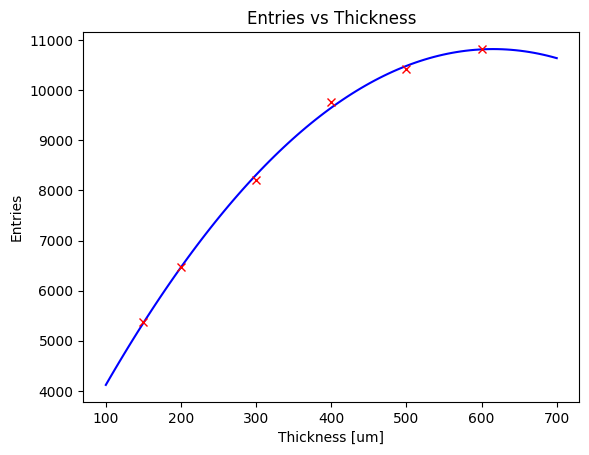

In [32]:
thickness = [150, 200, 300, 400, 500, 600]

entries = []

for i in thickness:
    file = ROOT.TFile.Open(f"{i}um.root")
    entries.append(file.ComptonHits.GetEntries())
    
# Best fit to the data 
x = np.array(thickness)
y = np.array(entries)
pol = np.polyfit(x, y, 2)
x_plot = np.linspace(100, 700, 100)
y_plot = np.polyval(pol, x_plot)
plt.plot(x_plot, y_plot, c = 'b')

plt.plot(thickness, entries, 'x', c = 'r')
plt.xlabel("Thickness [um]")
plt.ylabel("Entries")
plt.title("Entries vs Thickness")
plt.show()

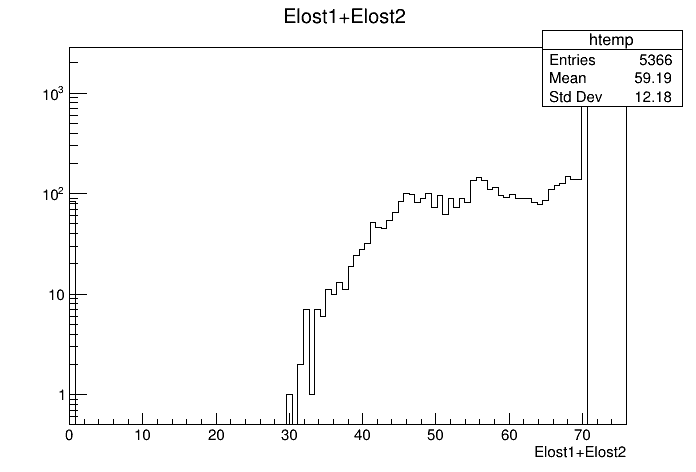

In [20]:
file = ROOT.TFile.Open("150um.root")
c1 = ROOT.TCanvas()
c1.SetLogy()
file.ComptonHits.Draw("Elost1+Elost2","","")
c1.Draw()

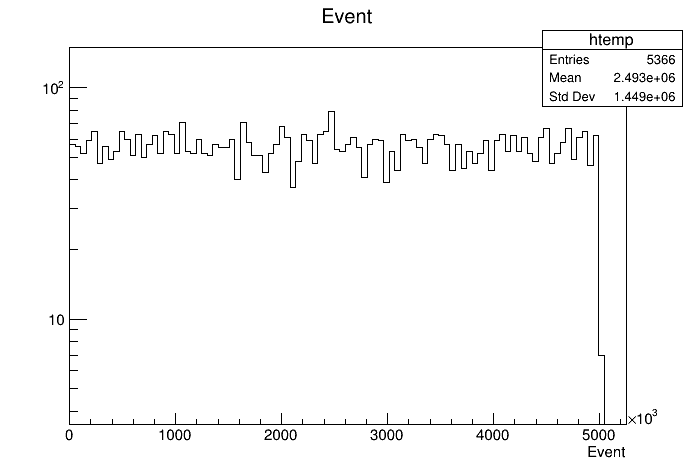

In [5]:
file = ROOT.TFile.Open("150um.root")
c1 = ROOT.TCanvas()
c1.SetLogy()
file.ComptonHits.Draw("Event","","")
c1.Draw()